In [18]:
include("../ode_solver.jl")
using PlotlyJS

Function Definition

In [19]:
"""
dx/dt = x
"""

function f(x, t)
    return x
end

f (generic function with 1 method)

Plot of approximation methods compared to solution

  0.000265 seconds (3.69 k allocations: 116.734 KiB)
  0.000608 seconds (6.49 k allocations: 291.672 KiB)
  0.000458 seconds (10.22 k allocations: 524.922 KiB)
  0.000514 seconds (7.42 k allocations: 349.984 KiB)
  0.000434 seconds (8.67 k allocations: 427.750 KiB)


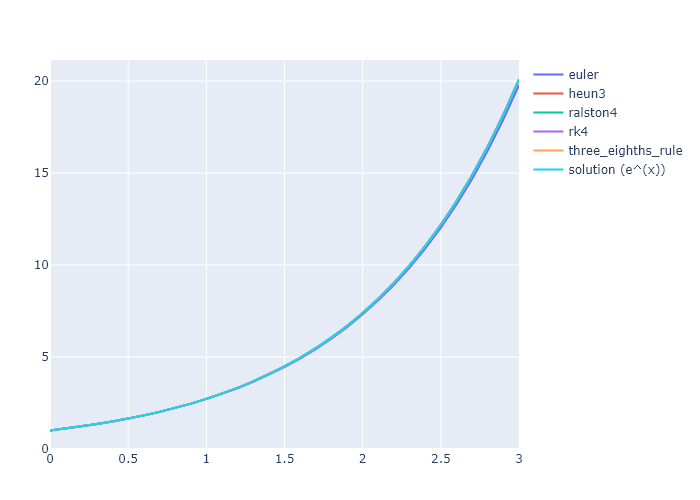

In [31]:
t = 0:0.1:3
x0 = [1]
deltat_max = 0.01

@time s1 = solve_ode(f, x0, t, "euler", deltat_max)[:,1]
@time s2 = solve_ode(f, x0, t, "heun3", deltat_max)[:,1]
@time s3 = solve_ode(f, x0, t, "ralston4", deltat_max)[:,1]
@time s4 = solve_ode(f, x0, t, "rk4", deltat_max)[:,1]
@time s5 = solve_ode(f, x0, t, "three_eighths_rule", deltat_max)[:,1]

# Create traces
euler = scatter(x=t, y=s1, mode="lines", name="euler")
heun3 = scatter(x=t, y=s2, mode="lines", name="heun3")
ralston4 = scatter(x=t, y=s3, mode="lines", name="ralston4")
rk4 = scatter(x=t, y=s2, mode="lines", name="rk4")
three_eighths_rule = scatter(x=t, y=s5, mode="lines", name="three_eighths_rule")

solution = scatter(x=0:0.01:3, y=exp.(0:0.01:3), mode="lines", name="solution (e^(x))")

plot([euler, heun3, ralston4, rk4, three_eighths_rule, solution])

Error Plot

In [ ]:
x0 = [1]
t = [0 1]

# Euler estimate of x(1)
deltat_max = 0.001
solution = solve_ode(f, x0, t, "euler", deltat_max)
println("Euler approximation = ", solution[end][1])

# Heun3 estimate of x(1)
deltat_max = 0.001
solution = solve_ode(f, x0, t, "heun3", deltat_max)
println("Heun3 approximation = ", solution[end][1])

# Ralston4 estimate of x(1)
deltat_max = 0.001
solution = solve_ode(f, x0, t, "ralston4", deltat_max)
println("Ralston4 approximation = ", solution[end][1])

# RK4 estimate of x(1)
deltat_max = 0.001
solution = solve_ode(f, x0, t, "rk4", deltat_max)
println("RK4 approximation = ", solution[end][1])

# 3/8 Rule estimate of x(1)
deltat_max = 0.001
solution = solve_ode(f, x0, t, "three_eighths_rule", deltat_max)
println("3/8 Rule approximation = ", solution[end][1])


deltat_max = exp10.(range(-5,0,80))
real = ℯ

euler_error = Any[]
heun3_error = Any[]
ralston4_error = Any[]
rk4_error = Any[]
three_eighths_rule_error = Any[]

for value in deltat_max
    euler_sol = solve_ode(f, x0, t, "euler", value)[end][1];
    heun3_sol = solve_ode(f, x0, t, "heun3", value)[end][1];
    ralston4_sol = solve_ode(f, x0, t, "ralston4", value)[end][1];
    rk4_sol = solve_ode(f, x0, t, "rk4", value)[end][1];
    three_eighths_rule_sol = solve_ode(f, x0, t, "three_eighths_rule", value)[end][1];
    push!(euler_error, abs.(euler_sol .- real))
    push!(heun3_error, abs.(heun3_sol .- real))
    push!(ralston4_error, abs.(ralston4_sol .- real))
    push!(rk4_error, abs.(rk4_sol .- real))
    push!(three_eighths_rule_error, abs.(three_eighths_rule_sol .- real))   
end

t1 = scatter(x=deltat_max, y=euler_error, mode="lines", name="Euler")
t2 = scatter(x=deltat_max, y=heun3_error, mode="lines", name="Heun3 ")
t3 = scatter(x=deltat_max, y=ralston4_error, mode="lines", name="Ralston 4")
t4 = scatter(x=deltat_max, y=rk4_error, mode="lines", name="RK 4")
t5 = scatter(x=deltat_max, y=three_eighths_rule_error, mode="lines", name="3/8 Rule")

layout = Layout(
    xaxis_type="log",
    xaxis_exponentformat="power",
    xaxis_title="Δt",
    yaxis_type="log",
    yaxis_exponentformat="power",
    yaxis_title="error",
    width=700, height=350,
    )
data = [t1, t4, t2, t3, t5]

plot(data, layout)

Timing

In [17]:
t = [0 1]
x0 = [1]
required_error = 1e-5

deltat_max = 1
method_error = 1
while method_error >= required_error
    deltat_max = deltat_max .* 0.1 
    s1 = solve_ode(f, x0, t, "euler", deltat_max)[end][1]
    method_error = abs(ℯ .- s1)
end


rk4_deltat_max = 1
method_error = 1
while method_error >= required_error
    rk4_deltat_max = rk4_deltat_max .* 0.1 
    s1 = solve_ode(f, x0, t, "rk4", rk4_deltat_max)[end][1]
    method_error = abs(ℯ .- s1)
end
println("For Euler error less than ", required_error, ", delta_t should be: ", round(deltat_max; digits=9))
println("For RK4 error less than ", required_error, ", delta_t should be: ", round(rk4_deltat_max; digits=9))


@time s1 = solve_ode(f, x0, t, "euler", deltat_max)[end][1];
println("\nEuler method error: ", abs(ℯ .- s1))
@time s2 = solve_ode(f, x0, t, "rk4", rk4_deltat_max)[end][1];
println("RK4 method error: ", abs(ℯ .- s2))

For Euler error less than 1.0e-5, delta_t should be: 1.0e-6
For RK4 error less than 1.0e-5, delta_t should be: 0.1
  1.129669 seconds (14.00 M allocations: 411.988 MiB, 4.16% gc time)

Euler method error: 1.3591610961150025e-6
  0.000061 seconds (358 allocations: 14.266 KiB)
RK4 method error: 2.0843238788259555e-6


ODE Systems Extensions

In [21]:
"""
System of equations definitions for
    d^2x/dt^2 = -x,
equivalent to the system of equations
    dx/dt = y and dy/dt = -x.
"""

function f2(u, t)

    if(!isapprox(length(u), 2.0; atol=eps(Float64), rtol=0))
        throw(error("Please make sure you have entered two initial conditions for the function."))
    end

    x = u[1]    
    y = u[2]
    
    x_dot = y
    y_dot = -x
    
    return [x_dot y_dot]
end

function f2_solution(u, t)

    c1 = u[2]
    c2 = u[1]

    x = c1*sin.(t) + c2*cos.(t)
    y = c1*cos.(t) - c2*sin.(t)

    return [x y]
end

f2_solution (generic function with 1 method)

Generate solution and estimate data for error plots

In [22]:
u = [0 0]
t = 0:0.1:10
real_t = 0:0.1:10
s = solve_ode(f2, u, t, "rk4", 0.001);
real_s = f2_solution(u, real_t);

x = s[:,1];
x_dot = s[:,2];
x_sol = real_s[:,1];
x_dot_sol = real_s[:,2];

Plot of solution and estimate for x versus t

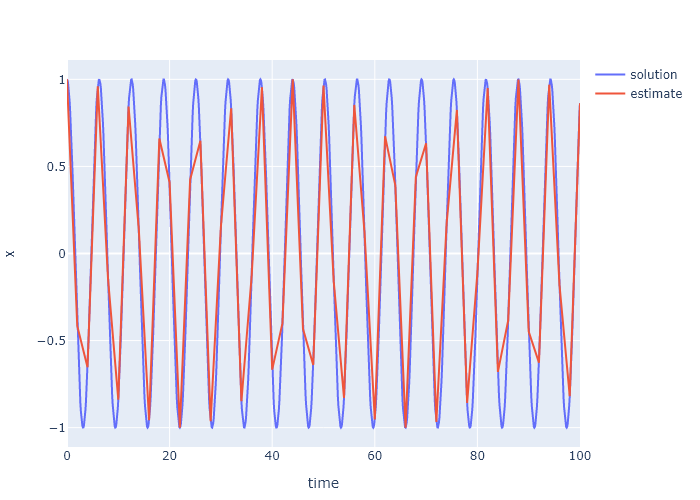

In [27]:
u = [1 0]
t = 0:2:100
real_t = 0:0.1:100
s = solve_ode(f2, u, t, "rk4", 0.001);
real_s = f2_solution(u, real_t);

x = s[:,1];
x_dot = s[:,2];
x_sol = real_s[:,1];
x_dot_sol = real_s[:,2];

solution = scatter(x=real_t, y=x_sol, mode="lines",name="solution")
estimate = scatter(x=t, y=x, mode="lines",name="estimate")

layout = Layout(
    xaxis_title="time",
    yaxis_title="x",
    width=700, height=350,
    )

plot([solution, estimate], layout)

# include("../visualisation.jl")
# plot_ode(f2, u, t, ["x" "y"])

Plot of solution and estimate for x versus x_dot

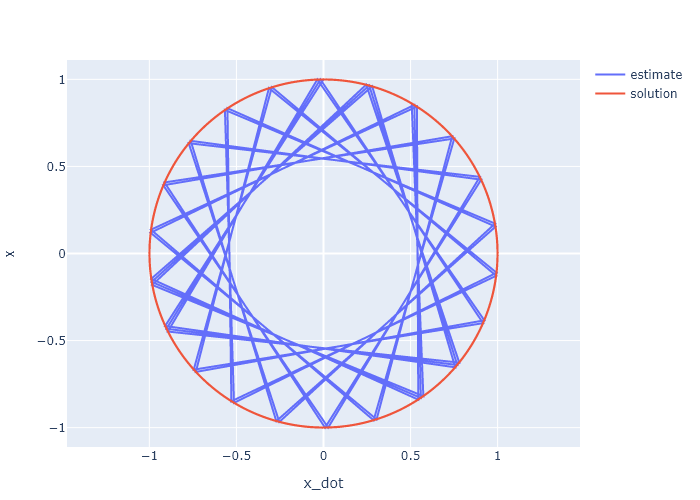

In [28]:
estimate = scatter(x=x_dot, y=x, mode="lines",name="estimate")
solution = scatter(x=x_dot_sol, y=x_sol, mode="lines",name="solution")
layout = Layout(
    yaxis=attr(scaleanchor = "x",scaleratio = 1),
    xaxis_title="x_dot",
    yaxis_title="x",
    width=700, height=350,
    )

plot([estimate, solution], layout)